# Description 

### 데이터셋 설명
    - 2018년 1월부터 2020년 2월까지 총 113주에 걸친 마케팅 채널 별 예산 분배 및 세일즈 값이 정리된 데이터
    - Facebook Impressions, Google search Impressions, Email Impressions, Affiliate channel Impressions 총 4개 채널의 
      Impression과 유튜브 Paid Views, 유튜브  Organic Views, Overall Views 정리
    - A ~ Z 총 26개의 Division별로 마케팅 채널 별 예산 및 세일즈 값 정리

### 데이터 분석 목표
    - 마케팅 데이터 EDA를 통한 인사이트 발견
    - 최적의 마케팅 예산 분배를 위한 세일즈 예측 알고리즘 개발

In [126]:
# 패키지 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge  
from sklearn.model_selection import GridSearchCV 

In [49]:
# 데이터셋 불러오기
file = '/Users/michael/Desktop/practice/Sample Media Spend Data.csv'
df = pd.read_csv(file)
df.tail()

,Division,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
3046,Z,2/1/2020,29239,25311,622406,1.459071e+06,45026,12098,53667,82707
3047,Z,2/8/2020,26230,28031,624409,5.342505e+05,227070,9548,53665,84503
3048,Z,2/15/2020,24749,31281,439362,4.227182e+05,393685,9861,55561,147325
3049,Z,2/22/2020,20713,30356,464178,6.085799e+05,424676,10221,49221,111525
3050,Z,2/29/2020,15990,26993,449032,4.390165e+05,161439,10294,42994,98187


# Data Cleaning

In [50]:
# 데이터셋 크기 및 데이터타입 확인
print(df.shape)
print(df.info())

(3051, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Division               3051 non-null   object 
 1   Calendar_Week          3051 non-null   object 
 2   Paid_Views             3051 non-null   int64  
 3   Organic_Views          3051 non-null   int64  
 4   Google_Impressions     3051 non-null   int64  
 5   Email_Impressions      3051 non-null   float64
 6   Facebook_Impressions   3051 non-null   int64  
 7   Affiliate_Impressions  3051 non-null   int64  
 8   Overall_Views          3051 non-null   int64  
 9   Sales                  3051 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 238.5+ KB
None


In [51]:
# 'Calendar_Week'컬럼을 시간 데이터로 변경
df['Calendar_Week']= pd.to_datetime(df['Calendar_Week'], format = '%m/%d/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Division               3051 non-null   object        
 1   Calendar_Week          3051 non-null   datetime64[ns]
 2   Paid_Views             3051 non-null   int64         
 3   Organic_Views          3051 non-null   int64         
 4   Google_Impressions     3051 non-null   int64         
 5   Email_Impressions      3051 non-null   float64       
 6   Facebook_Impressions   3051 non-null   int64         
 7   Affiliate_Impressions  3051 non-null   int64         
 8   Overall_Views          3051 non-null   int64         
 9   Sales                  3051 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 238.5+ KB


In [52]:
# 데이터 분석 목적이 마케팅 채널 별 최적의 예산 분배이므로, 마케팅 예산을 소진하지 않은 Organic_Views와 특정 채널이 구별되지 않는 Overall_View 컬럼은 분석 대상에서 제외
df = df.drop(columns = ['Organic_Views', 'Overall_Views'])
df.tail()

,Division,Calendar_Week,Paid_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Sales
3046,Z,2020-02-01,29239,622406,1.459071e+06,45026,12098,82707
3047,Z,2020-02-08,26230,624409,5.342505e+05,227070,9548,84503
3048,Z,2020-02-15,24749,439362,4.227182e+05,393685,9861,147325
3049,Z,2020-02-22,20713,464178,6.085799e+05,424676,10221,111525
3050,Z,2020-02-29,15990,449032,4.390165e+05,161439,10294,98187


In [53]:
# 혼동 방지를 위해, Paid_Views 컬럼명 변경
df.rename(columns = {'Paid_Views' : 'Youtube_Paid_Views'}, inplace = True)
df.tail()

,Division,Calendar_Week,Youtube_Paid_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Sales
3046,Z,2020-02-01,29239,622406,1.459071e+06,45026,12098,82707
3047,Z,2020-02-08,26230,624409,5.342505e+05,227070,9548,84503
3048,Z,2020-02-15,24749,439362,4.227182e+05,393685,9861,147325
3049,Z,2020-02-22,20713,464178,6.085799e+05,424676,10221,111525
3050,Z,2020-02-29,15990,449032,4.390165e+05,161439,10294,98187


In [54]:
# 'Division' 컬럼 분포 확인
print(df['Division'].unique())
pd.DataFrame(df['Division'].value_counts()).sort_index()

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


,Division
A,113
B,113
C,113
D,113
E,113
F,113
G,113
H,113
I,113
J,113


In [55]:
# 113주인데 왜 Z Division만 데이터가 226개지?
df[df['Division'] == 'Z'].sort_values('Calendar_Week')

,Division,Calendar_Week,Youtube_Paid_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Sales
2825,Z,2018-01-06,165,440,9.393009e+05,156226,43811,113911
2938,Z,2018-01-06,887,940,5.126463e+05,89989,26445,60627
2826,Z,2018-01-13,101,347,1.358203e+06,24364,37350,107477
2939,Z,2018-01-13,286,111,7.407334e+05,15233,25077,78949
2827,Z,2018-01-20,873,716,1.152332e+06,81574,57746,115549
...,...,...,...,...,...,...,...,...
2935,Z,2020-02-15,45720,873511,7.745703e+05,617157,20858,249249
3049,Z,2020-02-22,20713,464178,6.085799e+05,424676,10221,111525
2936,Z,2020-02-22,36729,892030,1.116236e+06,612204,26511,203100
2937,Z,2020-02-29,29735,831908,8.037641e+05,308350,21448,182305


In [56]:
# 데이터 분할된 것으로 추정, 디비전, 날짜 별로 데이터 합산
df2 = df.groupby(['Division', 'Calendar_Week'])[df.iloc[:, 2:].columns].sum()
df2.reset_index(inplace = True)
print(df2.info())
df2.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Division               2938 non-null   object        
 1   Calendar_Week          2938 non-null   datetime64[ns]
 2   Youtube_Paid_Views     2938 non-null   int64         
 3   Google_Impressions     2938 non-null   int64         
 4   Email_Impressions      2938 non-null   float64       
 5   Facebook_Impressions   2938 non-null   int64         
 6   Affiliate_Impressions  2938 non-null   int64         
 7   Sales                  2938 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 183.8+ KB
None


,Division,Calendar_Week,Youtube_Paid_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Sales
2933,Z,2020-02-01,81719,1808223,4.134490e+06,116636,32243,227501
2934,Z,2020-02-08,74602,1883440,1.513631e+06,568493,28303,226453
2935,Z,2020-02-15,70469,1312873,1.197289e+06,1010842,30719,396574
2936,Z,2020-02-22,57442,1356208,1.724816e+06,1036880,36732,314625
2937,Z,2020-02-29,45725,1280940,1.242781e+06,469789,31742,280492


In [57]:
# 26개의 Division 별로 113주의 데이터일때의 row의 수와 정제된 데이터 df2의 row수 일치 확인
print('df2의 row수 : {} = Division별 113주의 데이터 수 : {}'.format(df2.shape[0], 26*113))

df2의 row수 : 2938 = Division별 113주의 데이터 수 : 2938


일치한 것 확인

# EDA

<AxesSubplot:xlabel='Division', ylabel='Sales'>

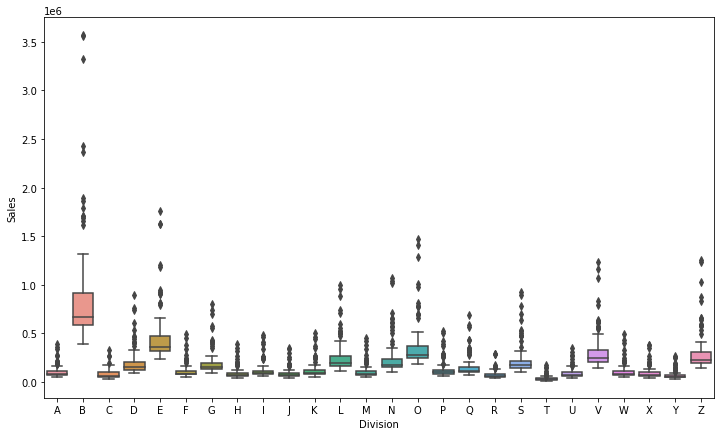

In [58]:
# Division별 데이터 분포 비교 : Sales
plt.rcParams["figure.figsize"] = (12, 7)
sns.boxplot(data = df2, x = 'Division', y = 'Sales')

Division 별로 Sales 데이터 다르게 분포하는 것 확인

Text(0.5, 1.0, 'Affiliate_Impressions / Division')

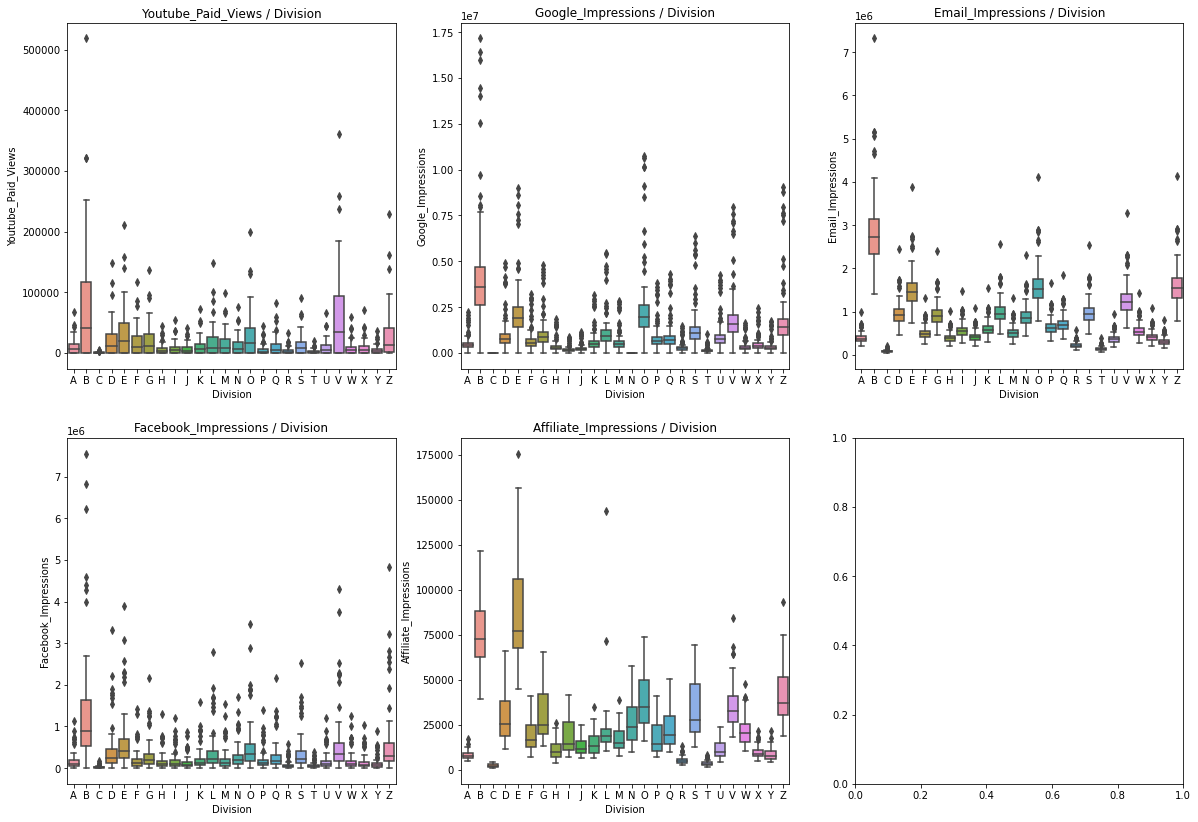

In [59]:
# Division별 데이터 분포 비교 : 마케팅 채널 별
plt.rcParams["figure.figsize"] = (20, 14)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
sns.boxplot(data = df2, x = 'Division', y = 'Youtube_Paid_Views', ax = ax1)
sns.boxplot(data = df2, x = 'Division', y = 'Google_Impressions', ax = ax2)
sns.boxplot(data = df2, x = 'Division', y = 'Email_Impressions', ax = ax3)
sns.boxplot(data = df2, x = 'Division', y = 'Facebook_Impressions', ax = ax4)
sns.boxplot(data = df2, x = 'Division', y = 'Affiliate_Impressions', ax = ax5)
ax1.set_title("Youtube_Paid_Views / Division")
ax2.set_title("Google_Impressions / Division")
ax3.set_title("Email_Impressions / Division")
ax4.set_title("Facebook_Impressions / Division")
ax5.set_title("Affiliate_Impressions / Division")

- Division 별로 마케팅 채널의 impression/view 데이터 다르게 분포하는 것 확인
- 모델 생성 시 Division 고려 필요성 확인

In [60]:
# 'Division' 컬럼 카테고리 데이터로 타입 변경
df2['Division'] = df2['Division'].astype('category')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Division               2938 non-null   category      
 1   Calendar_Week          2938 non-null   datetime64[ns]
 2   Youtube_Paid_Views     2938 non-null   int64         
 3   Google_Impressions     2938 non-null   int64         
 4   Email_Impressions      2938 non-null   float64       
 5   Facebook_Impressions   2938 non-null   int64         
 6   Affiliate_Impressions  2938 non-null   int64         
 7   Sales                  2938 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(5)
memory usage: 165.1 KB


In [61]:
# 정량 데이터 분포 비교
df2.describe()

,Youtube_Paid_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Sales
count,2938.000000,2.938000e+03,2.938000e+03,2.938000e+03,2938.000000,2.938000e+03
mean,15674.477876,9.202574e+05,7.897597e+05,2.794779e+05,23792.091219,1.930515e+05
std,31814.718655,1.406603e+06,6.585210e+05,4.867373e+05,22298.619280,2.385442e+05
min,1.000000,7.000000e+00,4.089445e+04,2.900000e+01,910.000000,1.543600e+04
25%,550.500000,1.652248e+05,3.724204e+05,5.714325e+04,9112.250000,7.348600e+04
50%,2689.500000,4.920710e+05,5.979215e+05,1.301855e+05,16951.500000,1.180955e+05
75%,17947.500000,1.083777e+06,1.015158e+06,2.963415e+05,29633.250000,2.181780e+05
max,518190.000000,1.715044e+07,7.317730e+06,7.558435e+06,175791.000000,3.575430e+06


- mean값을 보면 단위 차이가 많이 나서 스케일링 필요

In [87]:
# 정량 데이터 스케일링 (Normalization)
scale = MinMaxScaler()
df_sc = pd.DataFrame(scale.fit_transform(df2.iloc[:,2:]), columns = df2.iloc[:,2:].columns)
# 스케일링한 정정량  데이터와 카테고리, 날짜 데이터 다시 합치기
df3 = pd.concat([df2[['Division', 'Calendar_Week']], df_sc], axis = 1)
df3.tail()

,Division,Calendar_Week,Youtube_Paid_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Sales
2933,Z,2020-02-01,0.157699,0.105433,0.562552,0.015427,0.179168,0.059569
2934,Z,2020-02-08,0.143965,0.109818,0.202387,0.075210,0.156638,0.059275
2935,Z,2020-02-15,0.135989,0.076550,0.158914,0.133734,0.170453,0.107061
2936,Z,2020-02-22,0.110850,0.079077,0.231408,0.137179,0.204836,0.084042
2937,Z,2020-02-29,0.088238,0.074688,0.165166,0.062151,0.176303,0.074454


,Youtube_Paid_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Sales
Youtube_Paid_Views,1.000000,0.302358,0.288866,0.316822,0.212819,0.287688
Google_Impressions,0.302358,1.000000,0.634983,0.727710,0.350456,0.783074
Email_Impressions,0.288866,0.634983,1.000000,0.512673,0.699314,0.740518
Facebook_Impressions,0.316822,0.727710,0.512673,1.000000,0.285810,0.746592
Affiliate_Impressions,0.212819,0.350456,0.699314,0.285810,1.000000,0.435687
Sales,0.287688,0.783074,0.740518,0.746592,0.435687,1.000000


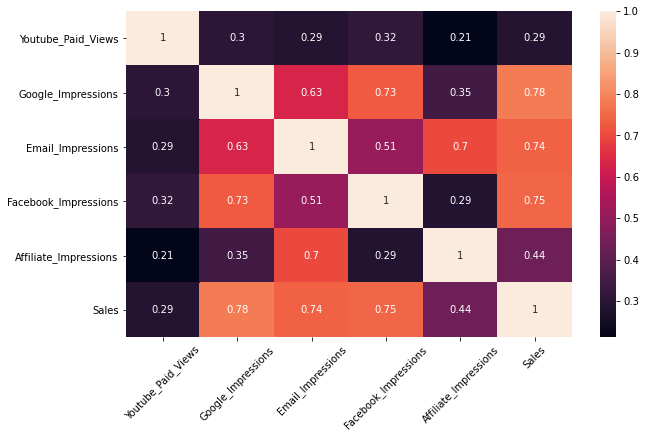

In [88]:
# 상관관계 분석
display(df3.corr())
# 상관관계 시각화
plt.rcParams["figure.figsize"] = (10, 6)
sns.heatmap(df3.corr(), annot = True)
plt.xticks(rotation = 45)
plt.show()

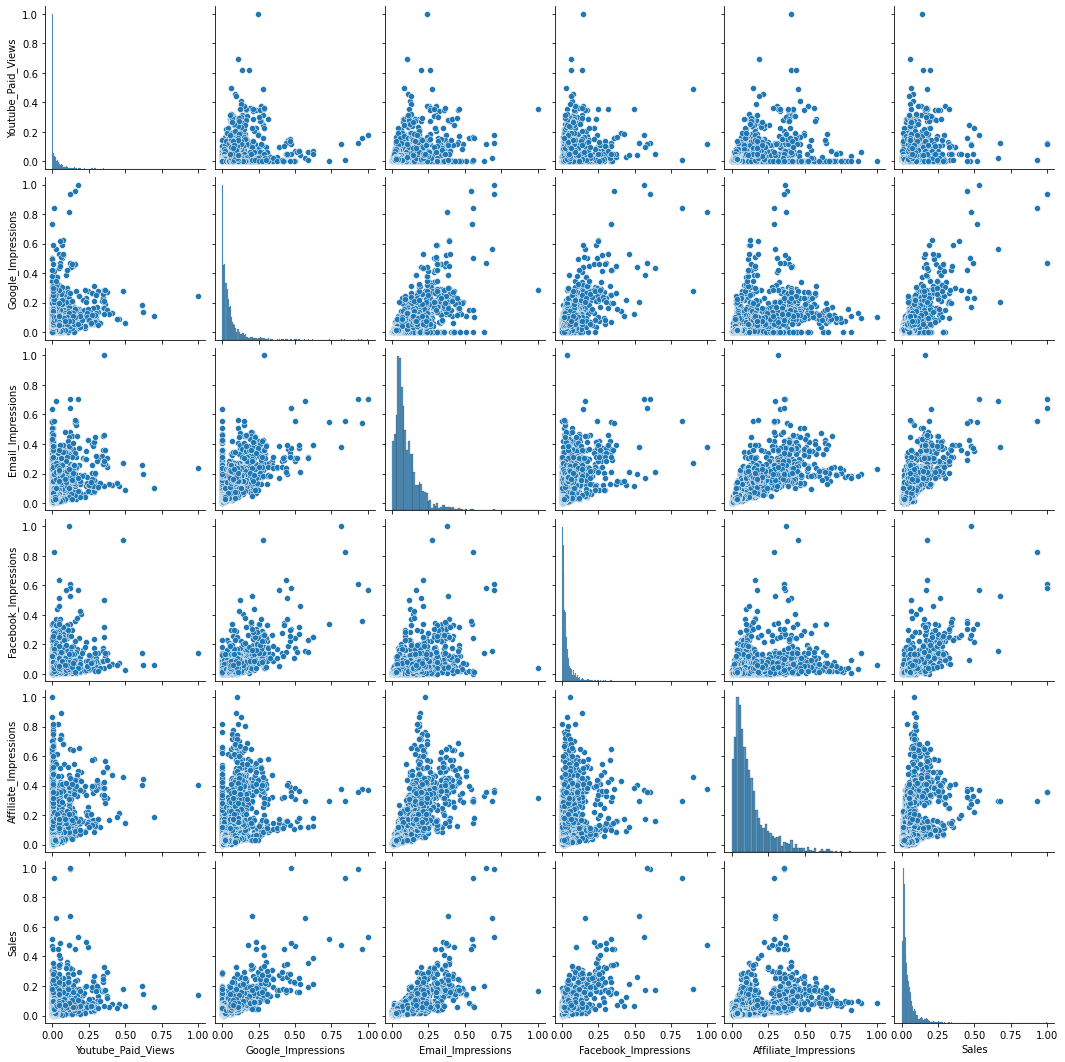

In [89]:
# 상관관계 및 데이터 분포 시각화
sns.pairplot(df3)

- Google_Impressions, Email_Impressions, Facebook_Impressions가 Sales데이터와 상관관계가 높은 것 확인
- impression, sales 데이터들이 전반적으로 왼쪽으로 왜곡되어있어 -> 평균은 낮지만 평균을 상회하는 값들이 많다 / 정규분포를 따르진 않는다

In [246]:
# Division 더미변수화
df4 = pd.get_dummies(df3)
df4 = df4[['Calendar_Week', 'Youtube_Paid_Views', 'Google_Impressions',
       'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions',
       'Division_A', 'Division_B', 'Division_C', 'Division_D',
       'Division_E', 'Division_F', 'Division_G', 'Division_H', 'Division_I',
       'Division_J', 'Division_K', 'Division_L', 'Division_M', 'Division_N',
       'Division_O', 'Division_P', 'Division_Q', 'Division_R', 'Division_S',
       'Division_T', 'Division_U', 'Division_V', 'Division_W', 'Division_X',
       'Division_Y', 'Division_Z', 'Sales']]
df4.tail()

,Calendar_Week,Youtube_Paid_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Division_A,Division_B,Division_C,Division_D,...,Division_R,Division_S,Division_T,Division_U,Division_V,Division_W,Division_X,Division_Y,Division_Z,Sales
2933,2020-02-01,0.157699,0.105433,0.562552,0.015427,0.179168,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.059569
2934,2020-02-08,0.143965,0.109818,0.202387,0.075210,0.156638,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.059275
2935,2020-02-15,0.135989,0.076550,0.158914,0.133734,0.170453,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.107061
2936,2020-02-22,0.110850,0.079077,0.231408,0.137179,0.204836,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.084042
2937,2020-02-29,0.088238,0.074688,0.165166,0.062151,0.176303,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.074454


# 세일즈 예측 머신러닝

In [247]:
# 전체 데이터의 독립변수, 종속변수 분리
X = df4.iloc[:, 1:-1]
y = df4['Sales']
print(X)
print(y)

      Youtube_Paid_Views  Google_Impressions  Email_Impressions  \
0               0.000755            0.000023           0.042464   
1               0.001517            0.000006           0.063953   
2               0.000154            0.000043           0.053478   
3               0.000046            0.000003           0.051788   
4               0.001088            0.000017           0.050518   
...                  ...                 ...                ...   
2933            0.157699            0.105433           0.562552   
2934            0.143965            0.109818           0.202387   
2935            0.135989            0.076550           0.158914   
2936            0.110850            0.079077           0.231408   
2937            0.088238            0.074688           0.165166   

      Facebook_Impressions  Affiliate_Impressions  Division_A  Division_B  \
0                 0.009731               0.063826           1           0   
1                 0.001558               

In [248]:
# Train set, Test set 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 33)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2056, 31)
(882, 31)
(2056,)
(882,)


In [249]:
# Linear Regression 모델 학습 및 테스트
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

regs = reg.score(X_test, y_test)
regt = np.sqrt(mse(y_test, y_pred))
regf = reg.coef_
print(regs)
print(regt)
print(regf)

0.7562350529996416
0.032148845599584315
[-8.43989486e-02  2.30553901e-01  2.61688093e-01  3.64768696e-01
 -1.50236443e-01  8.89206257e+10  8.89206257e+10  8.89206257e+10
  8.89206257e+10  8.89206257e+10  8.89206257e+10  8.89206257e+10
  8.89206257e+10  8.89206257e+10  8.89206257e+10  8.89206257e+10
  8.89206257e+10  8.89206257e+10  8.89206257e+10  8.89206257e+10
  8.89206257e+10  8.89206257e+10  8.89206257e+10  8.89206257e+10
  8.89206257e+10  8.89206257e+10  8.89206257e+10  8.89206257e+10
  8.89206257e+10  8.89206257e+10  8.89206257e+10]


In [250]:
# Ridge Regression 모델 학습 및 테스트
rrg = Ridge()
rrg.fit(X_train, y_train)
y_pred = rrg.predict(X_test)

rrgs = rrg.score(X_test, y_test)
rrgt = np.sqrt(mse(y_test, y_pred))
rrgf = rrg.coef_
print(rrgs)
print(rrgt)
print(rrgf)

0.7667998066336134
0.03144446489436319
[-6.77239730e-02  2.44122931e-01  2.22004872e-01  3.13052141e-01
 -1.27275039e-01 -1.48419966e-02  8.67155946e-02 -2.62207962e-03
 -6.12884994e-03  7.14145190e-02 -1.03852841e-02 -1.03582412e-05
 -1.32396657e-02 -3.34484717e-03 -1.11932360e-02 -1.37893961e-02
  3.12434833e-03 -1.25521810e-02  2.36044836e-02  5.41769230e-03
 -1.49349181e-02 -9.86475110e-03 -1.25260055e-02  1.92045552e-03
 -1.99325390e-02 -1.88863394e-02  1.18140818e-02 -5.33710438e-03
 -1.47109537e-02 -1.71664981e-02 -2.54417124e-03]


In [251]:
# Random Forest Regression 모델 학습 및 테스트
tree = RandomForestRegressor()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

trees = tree.score(X_test, y_test)
treet = np.sqrt(mse(y_test, y_pred))
treef = tree.feature_importances_
print(trees)
print(treet)
print(treef)

0.8301270241525829
0.026837490447213046
[2.18417399e-02 3.56098131e-01 2.50254824e-01 2.96381634e-01
 4.56981264e-02 6.96358379e-05 1.25491584e-02 1.56568955e-04
 3.74332991e-04 6.85587018e-03 5.34900779e-05 3.95723013e-04
 4.19105352e-05 1.58140293e-04 1.32927865e-04 1.74385489e-04
 5.33385176e-04 1.06617799e-04 2.16551539e-03 1.36968244e-03
 1.64694310e-04 3.58220986e-04 8.91177257e-05 2.56126771e-04
 8.04489151e-04 1.21953865e-04 7.09778699e-04 2.41580851e-04
 2.97851753e-05 1.23042933e-04 1.68941010e-03]


In [252]:
# Gradient Boost Regression 모델 학습 및 테스트
GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)

GBs = GB.score(X_test, y_test)
GBt = np.sqrt(mse(y_test, y_pred))
GBf = GB.feature_importances_
print(GBs)
print(GBt)
print(GBf)

0.8343662207395642
0.02650050872351523
[1.11310175e-02 3.33471180e-01 3.06869065e-01 2.78851438e-01
 3.91473533e-02 0.00000000e+00 1.08292726e-02 4.45804173e-04
 4.57616816e-05 9.17922199e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.33706104e-05 0.00000000e+00 0.00000000e+00
 4.15254158e-04 0.00000000e+00 5.36223072e-03 6.94680559e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.26803668e-04 9.00793292e-05 3.37249063e-04 0.00000000e+00
 0.00000000e+00 4.17113754e-05 2.41850637e-03]


In [253]:
# 모델 별 테스트 데이터 정리
models = pd.DataFrame(columns = ['Model', 'Accuracy_score', 'Root_Mean_Squared_Error'], 
                      data = {'Model' : ['LinearRegression', 'RidgeRegression', 'RandomForestRegressor', 'GradientBoostingRegressor'], 'Accuracy_score' :[regs, rrgs, trees, GBs], 'Root_Mean_Squared_Error' : [regt, rrgt, treet, GBt]})
display(models)

,Model,Accuracy_score,Root_Mean_Squared_Error
0,LinearRegression,0.756235,0.032149
1,RidgeRegression,0.766800,0.031444
2,RandomForestRegressor,0.830127,0.026837
3,GradientBoostingRegressor,0.834366,0.026501


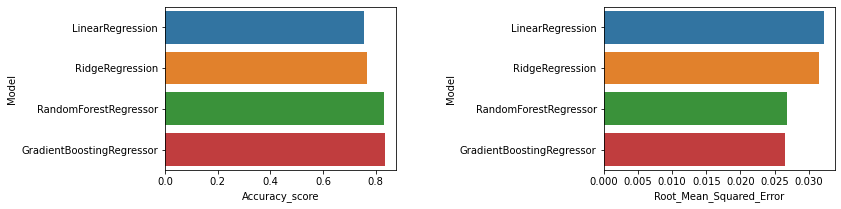

In [254]:
# 모델 별 테스트 데이터 시각화
plt.rcParams['figure.figsize'] = (12, 3)
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.barplot(x = 'Accuracy_score', y = 'Model', data = models, ax = ax1)
sns.barplot(x = 'Root_Mean_Squared_Error', y = 'Model', data = models, ax = ax2)
plt.subplots_adjust(wspace = 0.9)

GradientBoostingRegressor가 가장 우수한 모델로 확인

그런데 Division을 고려하지 않는다면 어떨까? Division을 고려하지 않아도 사실 머신러닝 예측에 영향을 주지 않는 것 아닐까?

In [ ]:
그런데 Division을 고려하지 않는다면 어떨까? Division을 고려하지 않아도 사실 머신러닝 예측에 영향을 주지 않는 것 아닐까

In [245]:
# 전체 데이터의 독립변수, 종속변수 분리
X = df3.iloc[:, 2:-1]
y = df3['Sales']
print(X)
print(y)

# Train set, Test set 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 33)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Gradient Boost Regression 모델 학습 및 테스트
n_GB = GradientBoostingRegressor()
n_GB.fit(X_train, y_train)
y_pred = n_GB.predict(X_test)

n_GBs = n_GB.score(X_test, y_test)
n_GBt = np.sqrt(mse(y_test, y_pred))
n_GBf = n_GB.feature_importances_
print(n_GBs)
print(n_GBt)
print(n_GBf)

      Youtube_Paid_Views  Google_Impressions  Email_Impressions  \
0               0.000755            0.000023           0.042464   
1               0.001517            0.000006           0.063953   
2               0.000154            0.000043           0.053478   
3               0.000046            0.000003           0.051788   
4               0.001088            0.000017           0.050518   
...                  ...                 ...                ...   
2933            0.157699            0.105433           0.562552   
2934            0.143965            0.109818           0.202387   
2935            0.135989            0.076550           0.158914   
2936            0.110850            0.079077           0.231408   
2937            0.088238            0.074688           0.165166   

      Facebook_Impressions  Affiliate_Impressions  
0                 0.009731               0.063826  
1                 0.001558               0.049113  
2                 0.006907             

In [257]:
# Division을 더미 변수로 고려한 모델(GB)과 고려하지 않은 모델(n_GB) 비교
print('Division 고려할 때 Accuracy score: {} > Division 고려하지 않을 때 Accuracy score: {}'.format(GBs, n_GBs))
print('Division 고려할 때 RMSE: {} < Division 고려하지 않을 때 RMSE: {}'.format(GBt, n_GBt))

Division 고려할 때 Accuracy score: 0.8343662207395642 > Division 고려하지 않을 때 Accuracy score: 0.8282840966255054
Division 고려할 때 RMSE: 0.02650050872351523 < Division 고려하지 않을 때 RMSE: 0.026982675776222254


큰 차이는 아니지만 Division을 더미변수로 활용할 때 머신러닝 모델 정확도 높아지는 것 확인

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Youtube_Paid_Views'),
  Text(1, 0, 'Google_Impressions'),
  Text(2, 0, 'Email_Impressions'),
  Text(3, 0, 'Facebook_Impressions'),
  Text(4, 0, 'Affiliate_Impressions'),
  Text(5, 0, 'Division_A'),
  Text(6, 0, 'Division_B'),
  Text(7, 0, 'Division_C'),
  Text(8, 0, 'Division_D'),
  Text(9, 0, 'Division_E'),
  Text(10, 0, 'Division_F'),
  Text(11, 0, 'Division_G'),
  Text(12, 0, 'Division_H'),
  Text(13, 0, 'Division_I'),
  Text(14, 0, 'Division_J'),
  Text(15, 0, 'Division_K'),
  Text(16, 0, 'Division_L'),
  Text(17, 0, 'Division_M'),
  Text(18, 0, 'Division_N'),
  Text(19, 0, 'Division_O'),
  Text(20, 0, 'Division_P'),
  Text(21, 0, 'Division_Q'),
  Text(22, 0, 'Division_R'),
  Text(23, 0, 'Division_S'),
  Text(24, 0, 'Division_T'),
  Text(25, 0, 'Division_U'),
  Text(26, 0, 'Division_V'),
  Text(27, 0, 'Division_W'),
  Text(28, 0

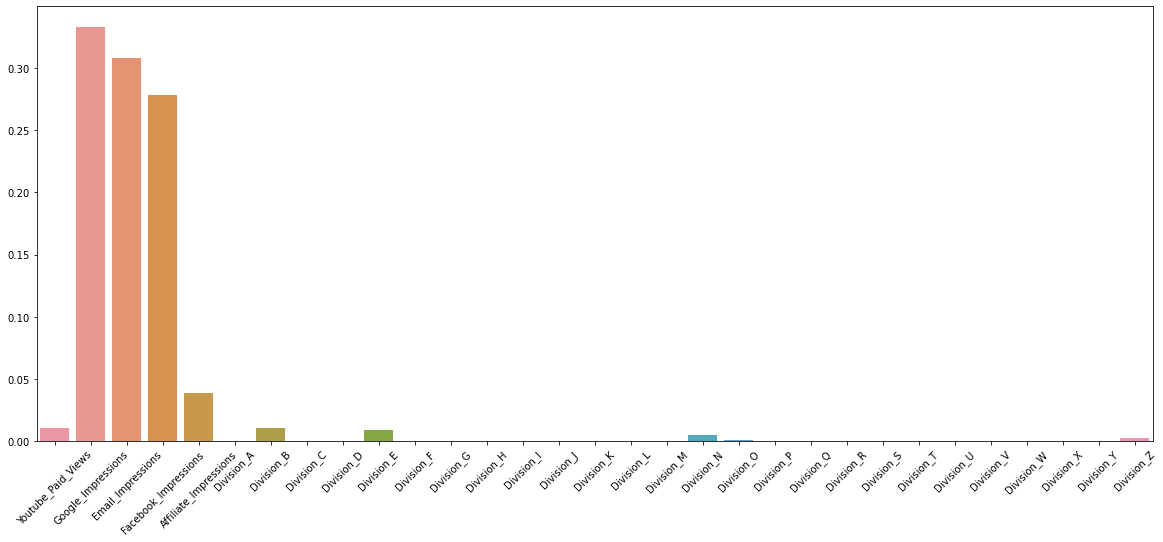

In [231]:
# 변수별 중요성 확인
plt.rcParams['figure.figsize'] = (20, 8)
sns.barplot(x = X_train.columns, y = GBf)
plt.xticks(rotation = 45)

<AxesSubplot:xlabel='Division', ylabel='Sales'>

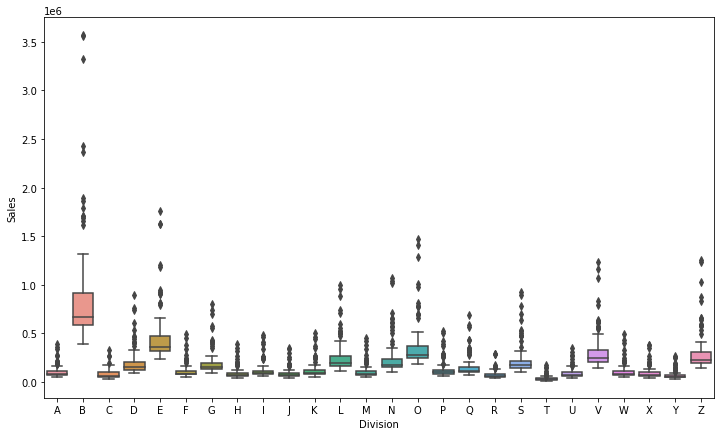

In [232]:
# Division별 데이터 분포 비교 : Sales
plt.rcParams["figure.figsize"] = (12, 7)
sns.boxplot(data = df2, x = 'Division', y = 'Sales')

- Google Imporessions, Email Impressions, Facebook Impresions가 매출에 가장 큰 영향을 주며
- Youtube Paid Views와 Affiliate Impressions는 매출에 큰 영향을 주지 않는 것으로 확인
- Division B, E, N에 속한 경우 매출에 영향을 주는데, Division 별 Sales 데이터 분포를 고려하면 해당 Division이 매출에 긍정적 영향을 준다고 추측할 수 있음

# 결론

- 113주에 걸친 총 26개 Division의 마케팅 채널 예산 분배와 세일즈 값의 데이터 분석을 통해 아래와 같은 인사이트 확인
    * Division 별로 Sales 데이터와 마케팅 채널의 Impression/View 데이터 다르게 분포
    * Google_Impressions, Email_Impressions, Facebook_Impressions가 Sales데이터와 상관관계가 높으며, 매출에 큰 영향을 줌
    * 어떤 Division에 속하는지 여부도 매출에 영향을 주는데 특히 Division B, E, N에 속한 경우 영향을 줄 수 있음

- Gradient Boost Regression을 활용한 매출 예측 머신러닝 모델 개발
    * 머신러닝 모델을 통해 마케팅 채널 예산 분배에 따른 세일즈 예측 가능
    * 세일즈 예측값을 통해 최적의 Google_Impressions, Email_Impressions, Facebook_Impressions, Youtube Paid Views, Affiliate Impressions 예측 가능
    * 마케팅 채널 별 Impression과 View 수에 대한 예측값과 채널 별 CPM, CPV단가를 통해 채널 별 예산 분배 가능